# 6.4.1 오버피팅
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음
- weight_decay_lambda = 0

# 6.4.2 가중치 감소 (weight decay)
- weight_decay_lambda = 0.1

epoch:0, train acc:0.06666666666666667, test acc:0.0867
epoch:1, train acc:0.07666666666666666, test acc:0.0999
epoch:2, train acc:0.10333333333333333, test acc:0.1115
epoch:3, train acc:0.12666666666666668, test acc:0.125
epoch:4, train acc:0.16666666666666666, test acc:0.1381
epoch:5, train acc:0.20666666666666667, test acc:0.1538
epoch:6, train acc:0.24, test acc:0.1627
epoch:7, train acc:0.2733333333333333, test acc:0.1788
epoch:8, train acc:0.31333333333333335, test acc:0.1988
epoch:9, train acc:0.32666666666666666, test acc:0.2155
epoch:10, train acc:0.36666666666666664, test acc:0.2411
epoch:11, train acc:0.42, test acc:0.2661
epoch:12, train acc:0.44666666666666666, test acc:0.2794
epoch:13, train acc:0.5033333333333333, test acc:0.3144
epoch:14, train acc:0.5533333333333333, test acc:0.3586
epoch:15, train acc:0.6033333333333334, test acc:0.4041
epoch:16, train acc:0.6366666666666667, test acc:0.4434
epoch:17, train acc:0.66, test acc:0.4682
epoch:18, train acc:0.7133333333333

epoch:168, train acc:1.0, test acc:0.7587
epoch:169, train acc:1.0, test acc:0.7583
epoch:170, train acc:1.0, test acc:0.7574
epoch:171, train acc:1.0, test acc:0.7592
epoch:172, train acc:1.0, test acc:0.7545
epoch:173, train acc:1.0, test acc:0.7573
epoch:174, train acc:1.0, test acc:0.7571
epoch:175, train acc:1.0, test acc:0.7595
epoch:176, train acc:1.0, test acc:0.7604
epoch:177, train acc:1.0, test acc:0.7605
epoch:178, train acc:1.0, test acc:0.7585
epoch:179, train acc:1.0, test acc:0.7588
epoch:180, train acc:1.0, test acc:0.7583
epoch:181, train acc:1.0, test acc:0.7604
epoch:182, train acc:1.0, test acc:0.7603
epoch:183, train acc:1.0, test acc:0.7608
epoch:184, train acc:1.0, test acc:0.7591
epoch:185, train acc:1.0, test acc:0.7615
epoch:186, train acc:1.0, test acc:0.7619
epoch:187, train acc:1.0, test acc:0.7594
epoch:188, train acc:1.0, test acc:0.7619
epoch:189, train acc:1.0, test acc:0.7599
epoch:190, train acc:1.0, test acc:0.7616
epoch:191, train acc:1.0, test acc

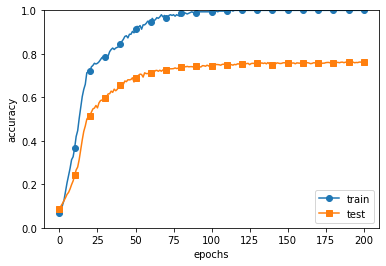

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_learning_github.dataset.mnist import load_mnist
from deep_learning_github.common.multi_layer_net import MultiLayerNet
from deep_learning_github.common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


# 6.4.3 드롭아웃(Dropout)

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask
        

train loss:2.30921676863729
=== epoch:1, train acc:0.09333333333333334, test acc:0.0954 ===
train loss:2.298861365949211
train loss:2.3132623226239932
train loss:2.301742696501429
=== epoch:2, train acc:0.09666666666666666, test acc:0.0957 ===
train loss:2.3262331918226336
train loss:2.323829108439069
train loss:2.3016775804521394
=== epoch:3, train acc:0.09666666666666666, test acc:0.0953 ===
train loss:2.3054348075764564
train loss:2.3063456897385906
train loss:2.294141622807897
=== epoch:4, train acc:0.09666666666666666, test acc:0.0956 ===
train loss:2.3192409448795117
train loss:2.3020345963002455
train loss:2.299535507216578
=== epoch:5, train acc:0.09333333333333334, test acc:0.0959 ===
train loss:2.3105042630828936
train loss:2.3138665070060065
train loss:2.307426263432346
=== epoch:6, train acc:0.09, test acc:0.0958 ===
train loss:2.3042543722738413
train loss:2.3103742652663737
train loss:2.3110030609426206
=== epoch:7, train acc:0.09333333333333334, test acc:0.0959 ===
train

=== epoch:58, train acc:0.32, test acc:0.2687 ===
train loss:2.2400731769726145
train loss:2.224880794436797
train loss:2.240922917056774
=== epoch:59, train acc:0.31, test acc:0.2685 ===
train loss:2.2093450025609647
train loss:2.226754814012354
train loss:2.222053536913765
=== epoch:60, train acc:0.33, test acc:0.2679 ===
train loss:2.2142498495077727
train loss:2.225585130005549
train loss:2.1975561108750834
=== epoch:61, train acc:0.3233333333333333, test acc:0.2691 ===
train loss:2.2298466785742783
train loss:2.2360960347079457
train loss:2.2081679654455018
=== epoch:62, train acc:0.32666666666666666, test acc:0.2721 ===
train loss:2.1974172287274145
train loss:2.19908756865734
train loss:2.2245794057906094
=== epoch:63, train acc:0.33, test acc:0.2726 ===
train loss:2.2335581527855983
train loss:2.2062301652687237
train loss:2.203082891850903
=== epoch:64, train acc:0.3233333333333333, test acc:0.274 ===
train loss:2.2105683901057605
train loss:2.2083296694079824
train loss:2.207

=== epoch:114, train acc:0.33, test acc:0.2824 ===
train loss:1.9588074208110557
train loss:2.0299144224823333
train loss:2.0799805990116536
=== epoch:115, train acc:0.33, test acc:0.2809 ===
train loss:2.0601616648007672
train loss:2.0275750770678727
train loss:2.054475697054026
=== epoch:116, train acc:0.33, test acc:0.2845 ===
train loss:2.0236467771673854
train loss:2.093433184287094
train loss:2.040234731121665
=== epoch:117, train acc:0.34, test acc:0.2864 ===
train loss:1.985172793449751
train loss:2.011777025127353
train loss:1.980043692755664
=== epoch:118, train acc:0.3333333333333333, test acc:0.2891 ===
train loss:2.0226683000958356
train loss:1.9908990579327612
train loss:2.0363582784510537
=== epoch:119, train acc:0.34, test acc:0.2898 ===
train loss:2.074993276676513
train loss:2.0053275795937995
train loss:2.037683571341407
=== epoch:120, train acc:0.3433333333333333, test acc:0.2907 ===
train loss:2.013513338318691
train loss:2.020563679934943
train loss:1.987651716179

=== epoch:170, train acc:0.4633333333333333, test acc:0.3588 ===
train loss:1.7479734992944913
train loss:1.6896015721399538
train loss:1.73914056849772
=== epoch:171, train acc:0.46, test acc:0.3579 ===
train loss:1.7140757960858317
train loss:1.8143927036800518
train loss:1.8033200076575153
=== epoch:172, train acc:0.46, test acc:0.3591 ===
train loss:1.8712497238838812
train loss:1.794641977428332
train loss:1.6536775221793139
=== epoch:173, train acc:0.46, test acc:0.3582 ===
train loss:1.8469132462955216
train loss:1.7882182408968053
train loss:1.5513901686068836
=== epoch:174, train acc:0.45666666666666667, test acc:0.3531 ===
train loss:1.6701377740842849
train loss:1.7841792523670748
train loss:1.8050679325928596
=== epoch:175, train acc:0.46, test acc:0.3573 ===
train loss:1.675124714788903
train loss:1.6498464330403178
train loss:1.6374013180817644
=== epoch:176, train acc:0.46, test acc:0.3571 ===
train loss:1.7773559450417402
train loss:1.764919807120735
train loss:1.749069

=== epoch:226, train acc:0.6333333333333333, test acc:0.4847 ===
train loss:1.4307869106153888
train loss:1.412739597220435
train loss:1.425179163871055
=== epoch:227, train acc:0.6466666666666666, test acc:0.484 ===
train loss:1.342627829944409
train loss:1.3795060235890277
train loss:1.387115190436886
=== epoch:228, train acc:0.64, test acc:0.4842 ===
train loss:1.5400078133523392
train loss:1.3276525071535155
train loss:1.3099138163020136
=== epoch:229, train acc:0.6333333333333333, test acc:0.4833 ===
train loss:1.39470030516806
train loss:1.303660638676393
train loss:1.3494914590353242
=== epoch:230, train acc:0.6233333333333333, test acc:0.4808 ===
train loss:1.4296015608673733
train loss:1.4200808250202706
train loss:1.3552274286677022
=== epoch:231, train acc:0.6233333333333333, test acc:0.4836 ===
train loss:1.3777803727869529
train loss:1.3310490297339728
train loss:1.3721660415308983
=== epoch:232, train acc:0.64, test acc:0.484 ===
train loss:1.3076202475724132
train loss:1

=== epoch:282, train acc:0.7233333333333334, test acc:0.5538 ===
train loss:0.9817819201650227
train loss:0.9171121830926825
train loss:0.975774428195633
=== epoch:283, train acc:0.7366666666666667, test acc:0.5596 ===
train loss:0.9889506960417777
train loss:0.9778966678816599
train loss:1.02354987069359
=== epoch:284, train acc:0.74, test acc:0.5622 ===
train loss:1.0979240957295422
train loss:0.99028644575363
train loss:1.0538897885594494
=== epoch:285, train acc:0.7533333333333333, test acc:0.565 ===
train loss:0.9204232877637343
train loss:1.0565894859222607
train loss:0.9832433554443049
=== epoch:286, train acc:0.75, test acc:0.5729 ===
train loss:0.9792481029704231
train loss:1.0608392611833728
train loss:0.9964798597067702
=== epoch:287, train acc:0.7433333333333333, test acc:0.5717 ===
train loss:1.1786860812589088
train loss:0.9328791994179335
train loss:0.9944815805440421
=== epoch:288, train acc:0.76, test acc:0.5782 ===
train loss:0.8791898938869288
train loss:1.0937508724

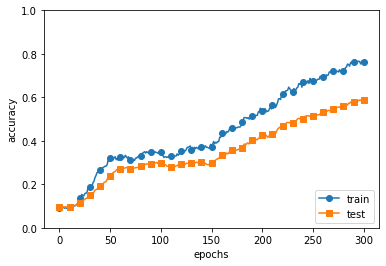

In [5]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_learning_github.dataset.mnist import load_mnist
from deep_learning_github.common.multi_layer_net_extend import MultiLayerNetExtend
from deep_learning_github.common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [11]:
x = np.array([10,11])
print(x)
print(*x.shape)

[10 11]
2
